# Import dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# from PIL import Image, ImageEnhance
import numpy as np

In [2]:
data_dir = 'dataset_part_1/'
# batch_size = 12
img_height = 144
img_width = 256
# validation_split = 0

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  # color_mode='grayscale',
  # validation_split=validation_split,
  # subset="training",
  seed=123,
  image_size=(img_height, img_width))
  # batch_size=batch_size)

# val_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   # color_mode='grayscale',
#   validation_split=validation_split,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width))
#   # batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 42720 files belonging to 3 classes.
['Modern', 'Photoreal', 'Retro']


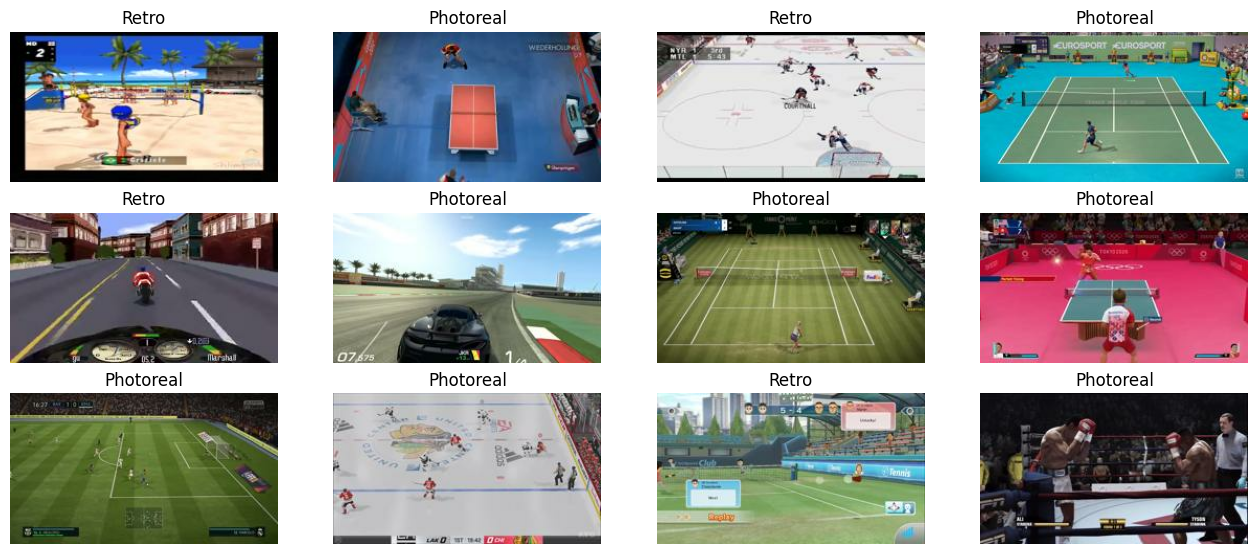

In [3]:
plt.figure(figsize=(16, 9))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].numpy().astype(np.uint8)
    plt.imshow(img) #, cmap=plt.cm.gray)
    plt.title(class_names[labels[i]])
    plt.axis("off")

# ANN Model

In [9]:
val_loss, val_acc = model.evaluate(val_ds)
print('Accuracy on test dataset:', val_acc)



534/534 [==============================] - 4s 7ms/step - loss: 0.1225 - accuracy: 0.9591
Accuracy on test dataset: 0.959113597869873


Modern 0.35
Photoreal 0.077
Retro 0.573


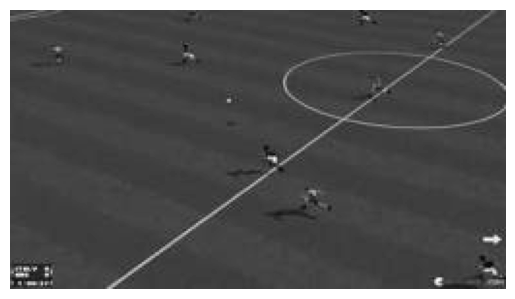

In [33]:
img_path = 'dataset/Retro/retro_12393.jpg'

img = Image.open(img_path).convert('L')
img = np.asarray(img)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis("off")
img, label = normalize(img, 0)
test = img[None,:,:]
predictions = model(test)
for i in range(3):
    print(class_names[i], round(predictions.numpy()[0][i], 3))

# Pretrain CNN model

In [4]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_ds = train_ds.map(normalize)
# val_ds = val_ds.map(normalize)

# train_ds = train_ds.cache()
# val_ds = val_ds.cache()

In [5]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(144, 256, 3)),
    tf.keras.layers.Conv2D(32, (17, 17), activation='relu'), #, input_shape=(144, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (9, 9), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# model.summary()

In [6]:
model.fit(train_ds, epochs=10, batch_size=1)

Epoch 1/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3883s 3s/step - accuracy: 0.7196 - loss: 0.9147
Epoch 2/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3734s 3s/step - accuracy: 0.9366 - loss: 0.1869
Epoch 3/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3713s 3s/step - accuracy: 0.9732 - loss: 0.0761
Epoch 4/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3720s 3s/step - accuracy: 0.9838 - loss: 0.0515
Epoch 5/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3720s 3s/step - accuracy: 0.9898 - loss: 0.0361
Epoch 6/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3715s 3s/step - accuracy: 0.9904 - loss: 0.0334
Epoch 7/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3696s 3s/step - accuracy: 0.9905 - loss: 0.0429
Epoch 8/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3700s 3s/step - accuracy: 0.9949 - loss: 0.0179
Epoch 9/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3679s 3s/step - accuracy: 0.9961 - loss: 0.0155
Epoch 10/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3701s 3s/step - accuracy: 0.9968 - loss: 0.0118


In [7]:
model.save_weights('./model_weights/pretrained_weights.weights.h5')

# Fine-tuning

In [8]:
data_dir = 'dataset_part_2/'
# batch_size = 12
img_height = 144
img_width = 256
# validation_split = 0

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  # color_mode='grayscale',
  # validation_split=validation_split,
  # subset="training",
  seed=123,
  image_size=(img_height, img_width))
  # batch_size=batch_size)

# val_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   # color_mode='grayscale',
#   validation_split=validation_split,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width))
#   # batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 21360 files belonging to 3 classes.
['Modern', 'Photoreal', 'Retro']


In [7]:
model.load_weights('./model_weights/pretrained_weights.weights.h5')

C:\Users\andrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [10]:
val_loss, val_acc = model.evaluate(train_ds)
print('Accuracy on test dataset:', val_acc)

668/668 ━━━━━━━━━━━━━━━━━━━━ 303s 452ms/step - accuracy: 0.7994 - loss: 750.9009
Accuracy on test dataset: 0.8022003769874573


In [15]:
for i in range(7):
    model.layers[i].trainable = False

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 240, 32)        │          27,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 120, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 56, 112, 64)         │         165,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 28, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 52, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 79872)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │     163,579,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           6,147 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491,646,731 (1.83 GB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 163,876,096 (625.14 MB)

 Optimizer params: 327,764,488 (1.22 GB)

In [17]:
optimizers = ['adam', 'sgd', 'lion', 'loss_scale_optimizer']

In [ ]:
for i in range(4):
    model.load_weights('./model_weights/pretrained_weights.weights.h5')
    model.optimizer = optimizers[i]
    model.fit(train_ds, epochs=3, batch_size=2)
    model.save_weights('./model_weights/' + optimizers[i] + '.weights.h5')

Epoch 1/3
361/668 ━━━━━━━━━━━━━━━━━━━━ 13:48 3s/step - accuracy: 0.8231 - loss: 107.8301